In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mean_time_decay(x, a, k, b):
    return a * np.exp(-k*x) + b

def half_life_decay(x, a, k, b):
    return a * pow(2, -k*x) + b

In [3]:
x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
y = np.array([109,62,39,13,10,4,2,0,1,2])

Mean Time Decay


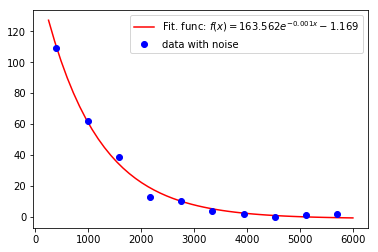

In [20]:
print "Mean Time Decay"
p0 = (1.,1.e-5,1.) # starting search koefs
opt, pcov = curve_fit(mean_time_decay, x, y, p0)
a, k, b = opt
# test result
x2 = np.linspace(250, 6000)  # with x2 here, it's making the curve smooth
y2 = mean_time_decay(x2, a, k, b)
fig, ax = plt.subplots()
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{-%.3f x} %+.3f$' % (a,k,b))
ax.plot(x, y, 'bo', label='data with noise')
ax.legend(loc='best')
plt.show()

Mean Time Decay


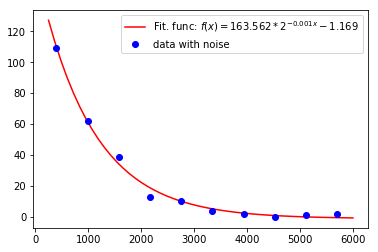

In [21]:
print "Mean Time Decay"
p0 = (1.,1.e-5,1.) # starting search koefs
opt, pcov = curve_fit(half_life_decay, x, y, p0)
a, k, b = opt
# test result
x2 = np.linspace(250, 6000)  # with x2 here, it's making the curve smooth
y2 = half_life_decay(x2, a, k, b)
fig, ax = plt.subplots()
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f*2^{-%.3f x} %+.3f$' % (a,k,b))
ax.plot(x, y, 'bo', label='data with noise')
ax.legend(loc='best')
plt.show()

In [16]:
import math

def mean_time_decay_x(y, a, k, b):
    return math.log((y-b)/a)/(-k)

def half_life_decay_x(y, a, k, b):
    return math.log((y-b)/a, 2)/(-k)

In [34]:
a = 163.562
b = -1.169
k= 0.001

print "Given half-life population, calculate the time and decay rate"
y_half_life = max(y)/2
x_half_life = half_life_decay_x(y_half_life, a, k, b)
decay_rate = math.log(2)/x_half_life
print "half_life population", y_half_life
print "half_life time", x_half_life
print "decay rate", decay_rate

Given half-life population, calculate the time and decay rate
half_life population 54
half_life time 1567.90787369
decay rate 0.00044208412509


In [35]:
a = 163.562
b = -1.169
k= 0.001

print "Given mena_time population, calculate the time and decay rate"
y_mean_time = max(y)/math.e
x_mean_time = mean_time_decay_x(y_mean_time, a, k, b)
decay_rate = 1/x_mean_time
print "mean_time population", y_mean_time
print "mean_time time", x_mean_time
print "decay rate", decay_rate

Given mena_time population, calculate the time and decay rate
mean_time population 40.0988590877
mean_time time 1377.10815668
decay rate 0.000726159376187
